In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

In [2]:
# making cluster with 200 data points in 2-dimension with 3 noisy clusters
blob_data = make_blobs(n_samples=20, n_features=2, centers=3, cluster_std=1)
# the tuple of generated sample contains =>(data points in 2d, respective cluster it belongs to)
data = blob_data[0]
labels = blob_data[1]

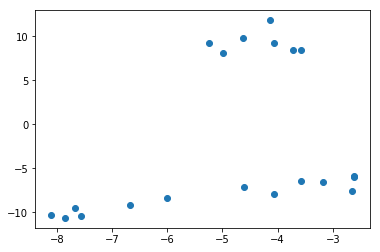

In [3]:
# Plotting the data points in 2d
datax = data[:,0]
datay = data[:, 1]
plt.scatter(datax, datay)

In [4]:
def _distance(point1, point2):
    diff = point1 - point2 # difference between center and data point
    sqrd = np.square(diff) # elementwise squaring
    axis = 1 if len(sqrd.shape) == 2 else None
    sumd = np.sum(sqrd, axis=axis) # not summing all data. but only n_features,i.e. columns (axis = 1)
    sqrt = np.sqrt(sumd) # square root after sum
    return sqrt

In [5]:
_distance(data[0], data).shape

(20,)

In [6]:
base_data = data

point1 = []
point2 = []
distance = []
indices = []
for i in range(len(base_data)):
    pt1 = base_data[i]
    otherpt = np.delete(base_data, i , axis=0)
#     print(pt1, otherpt)
    dist = _distance(pt1, otherpt)
#     print(pt1)
#     print(np.c_[base_data, dist])
#     dist = np.delete(dist, i, axis=0)
    closest = np.argmin(dist)
#     print(f'closest to {pt1} is {otherpt[closest]}, {closest}, {dist[closest]}')
    point1.append(pt1)
    point2.append(otherpt[closest])
    distance.append(dist[closest])
    index = closest
    if closest > i :index = closest+1
    indices.append((i, index))

In [7]:
min_dist_i = np.argmin(distance)
min_dist_i, distance[min_dist_i], point1[min_dist_i], point2[min_dist_i], indices[min_dist_i]

(1,
 0.1592963196812995,
 array([-2.61010601, -5.87217495]),
 array([-2.62231919, -6.03100239]),
 (1, 9))

In [8]:
base_data.shape

(20, 2)

In [9]:
base_data = np.delete(data, indices[min_dist_i][1], axis=0)
print(indices[min_dist_i])
base_data[indices[min_dist_i][0]] = (point1[min_dist_i] + point2[min_dist_i])/2.0
base_data.shape

(1, 9)


(19, 2)

In [10]:
point1 = []
point2 = []
distance = []
for i in range(len(base_data)):
    pt1 = base_data[i]
    otherpt = np.delete(base_data, i , axis=0)
#     print(pt1, otherpt)
    dist = _distance(pt1, otherpt)
#     print(pt1)
#     print(np.c_[base_data, dist])
#     dist = np.delete(dist, i, axis=0)
    closest = np.argmin(dist)
#     print(f'closest to {pt1} is {otherpt[closest]}, {closest}, {dist[closest]}')
    point1.append(pt1)
    point2.append(otherpt[closest])
    distance.append(dist[closest])

## try more powerful way

In [11]:
base_data = data
close_pair = []
# point1 = []
# point2 = []
# distance = []
# indices = []
distances = np.zeros((len(data), len(data)))
print(distances)

for i in range(len(base_data)-1):
    pt1 = base_data[i]
    dist = _distance(pt1, base_data[i+1:])
    distances[i, i+1:] = dist

#     distances[i+1:, i] = dist
    
#     distances[i]
#     print(pt1)
#     print(np.c_[base_data, dist])
#     dist = np.delete(dist, i, axis=0)
    closest = np.argmin(dist) +i+1 
#     distances[i, i+1+np.argmin(dist)] = dist[np.argmin(dist)]
    close_pair.append((i, closest, np.min(dist)))
    
    print(f'closest to {pt1} is {data[closest]}, {closest}, {distances[i,closest]}, {np.min(dist)}, {_distance(pt1, data[closest])}')
#     point1.append(pt1)
#     point2.append(otherpt[closest])
#     distance.append(dist[closest])
#     index = closest
#     if closest > i :index = closest+1
#     indices.append((i, index))

np.set_printoptions(precision=3)
print(distances)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [12]:
close_pair[np.argmin(np.array(close_pair)[:,2])]

(1, 9, 0.1592963196812995)

In [13]:
np.delete(distances, 17, axis=0).shape, np.delete(distances, 17, axis=1).shape

((19, 20), (20, 19))

In [14]:
base_data[6] = (data[6] + data[17]) / 2
base_data = np.delete(base_data, 17, axis=0)
base_data.shape

(19, 2)

In [15]:
distances = np.delete(distances, 17, axis=0)
distances = np.delete(distances, 17, axis=1)
distances.shape

(19, 19)

In [16]:
base_data[6]

array([-5.644, -0.968])

In [17]:
i=6
pt1 = base_data[i]
dist = _distance(pt1, base_data)
distances[i, i+1:] = dist[i+1:]
# distances[i+1:, i] = dist[i+1:]

#     distances[i]
#     print(pt1)
#     print(np.c_[base_data, dist])
#     dist = np.delete(dist, i, axis=0)
closest = np.argmin(dist) +i+1 
#     distances[i, i+1+np.argmin(dist)] = dist[np.argmin(dist)]
close_pair.append((i, closest, np.min(dist)))
print(distances)

[[ 0.    14.299 15.543 16.935 19.494 19.249 19.214 15.01   1.766 14.457
  17.88  18.368  1.451 14.833  3.455 16.299  0.982 15.99   1.869]
 [ 0.     0.     2.36   4.217  7.073  7.067  6.714  0.927 15.812  0.159
   5.266  6.23  14.14   1.123 17.742  2.493 15.188  1.697 15.338]
 [ 0.     0.     0.     1.873  4.772  4.735  4.416  1.531 16.924  2.27
   2.944  3.879 15.185  1.238 18.925  0.958 16.37   2.017 16.364]
 [ 0.     0.     0.     0.     2.913  2.862  2.562  3.338 18.227  4.115
   1.081  2.014 16.463  3.102 20.256  2.003 17.718  3.452 17.619]
 [ 0.     0.     0.     0.     0.     0.407  0.36   6.164 20.688  6.958
   1.832  1.129 18.91   5.979 22.737  4.665 20.229  6.028 20.034]
 [ 0.     0.     0.     0.     0.     0.     0.548  6.171 20.421  6.958
   1.802  0.914 18.642  5.959 22.472  4.71  19.973  6.106 19.76 ]
 [ 0.     0.     0.     0.     0.     0.     0.     6.161 10.826  5.896
   8.311  8.78   9.058  5.848 12.862  7.107 10.336  7.248 10.214]
 [ 0.     0.     0.     0.     0.  

In [18]:
class Element(object):
    
    def __init__(self, **kwargs):
        self.center = None
        self.n_data = None
        pass

    def get_center(self):
        pass
    
    def __repr__(self):
        pass

class Leaf(Element):
    
    def __init__(self, data):
        self.center = data
        self.n_data = 1
    
    def get_center(self):
        return self.center, self.n_data
    
    def __repr__(self):
        return f'{self.center} -> 1'

In [19]:
class Cluster(Element):
    
    def __init__(self, node1, node2):
        self.node1 = node1
        self.node2 = node2
        
        c1, n1 = node1.get_center()
        c2, n2 = node2.get_center()
        n = n1+ n2
        c = (c1*n1 + c2*n2)/n
        
        self.n_data = n
        self.center = c
    
    def get_center(self):
        return self.center, self.n_data
    
        
    def __repr__(self):
        return f'{self.center} -> {self.n_data}'

In [20]:
cluster_list = []
for dat in data:
    cluster_list.append(Leaf(dat))

In [21]:
cluster_list

[[-3.576  8.394] -> 1,
 [-2.61  -5.872] -> 1,
 [-4.617 -7.114] -> 1,
 [-6.011 -8.364] -> 1,
 [ -7.847 -10.626] -> 1,
 [ -8.107 -10.313] -> 1,
 [-5.644 -0.968] -> 1,
 [-3.171 -6.61 ] -> 1,
 [-4.631  9.81 ] -> 1,
 [-2.622 -6.031] -> 1,
 [-6.679 -9.215] -> 1,
 [-7.666 -9.512] -> 1,
 [-4.989  8.066] -> 1,
 [-3.579 -6.439] -> 1,
 [-4.132 11.804] -> 1,
 [-4.064 -7.897] -> 1,
 [-4.065  9.246] -> 1,
 [-3.722  8.465] -> 1,
 [-2.652 -7.569] -> 1,
 [-5.244  9.238] -> 1]

In [22]:
cl1 = Cluster(cluster_list[1], cluster_list[2])
cl1

[-3.613 -6.493] -> 2

In [23]:
Cluster(cluster_list[0], cl1)

[-3.601 -1.531] -> 3

In [24]:
data[:3].mean(axis=0)

array([-3.601, -1.531])

### Making Algorithm

In [281]:
class HierarchicalClustering(object):
    
    def __init__(self, data):
        self.data = data
        self.cluster_list = []
        for dat in data:
            self.cluster_list.append(Leaf(dat))
        self.near_clusters = None
        self.n_hierarchy = 0
        
    def _distance(self, cluster1:Element, cluster2:Element):
        point1 = cluster1.center
        point2 = cluster2.center
        
        diff = point1 - point2
        sqrd = np.square(diff)
        sumd = np.sum(sqrd)
        sqrt = np.sqrt(sumd)
        return sqrt
    
    def find_nearest_center(self):
        min_dist = 9999999.
        clusteri = None
        clen = len(self.cluster_list)
        for i in range(clen):
#             cluster1 = self.cluster_list[i]
            for j in range(i+1, clen):
#                 if i==j:
#                     print('i=j')
#                     continue
#                 cluster2= self.cluster_list[j]
                dist = self._distance(self.cluster_list[i], self.cluster_list[j])
                if dist < min_dist:
                    min_dist = dist
                    clusteri = (i, j)
        self.near_clusters = clusteri
        return self.near_clusters                
        
    def merge_nearest_clusters(self):
        cl0 = self.near_clusters[0]
        cl1 = self.near_clusters[1]
        self.near_clusters = None
        
        new_cluster = Cluster(self.cluster_list[cl0], self.cluster_list[cl1])
        self.cluster_list[cl0] = new_cluster # replacing first with
        self.cluster_list.pop(cl1)
        self.n_hierarchy += 1
    
#     def print_cluster(self, cluster=None, connection=None):
#         if cluster is None:
#             cluster = self.cluster_list[0]
#         if connection is None:
#             connection = '-'*self.n_hierarchy
            
#         if isinstance(cluster.node1, Leaf):
#             print(cluster.node1.center, connection+'|')
#         else:
#             self.print_cluster(cluster.node1,connection[:-1])
#         if isinstance(cluster.node2, Leaf):
#             print(cluster.node2.center, connection+'|')
#         else:
#             self.print_cluster(cluster.node2, connection[:-1])

#     def print_cluster(self, cluster=None, hierarchy=None):
#         if cluster is None:
#             cluster = self.cluster_list[0]
#         if hierarchy is None:
#             hierarchy = self.n_hierarchy
        
#         # base case
#         if isinstance(cluster, Leaf):
#             print('       '*(cluster.n_data-1), cluster.center, end='')
#             return
        
#         self.print_cluster(cluster.node1, hierarchy-1)
#         print('-------')
#         print('       '*(cluster.n_data-1), cluster)        
#         self.print_cluster(cluster.node2, hierarchy-1)
#         print('-------')

#     def print_cluster(self, cluster=None, hierarchy=None):
#         if cluster is None:
#             cluster = self.cluster_list[0]
#         if hierarchy is None:
#             hierarchy = self.n_hierarchy
        
#         # base case
#         if isinstance(cluster, Leaf):
#             print('       '*(cluster.n_data-1), cluster.center, end='')
#             return
        
#         self.print_cluster(cluster.node1, hierarchy-1)
#         print('-------')
#         print('       '*(cluster.n_data-1), cluster)        
#         self.print_cluster(cluster.node2, hierarchy-1)
#         print('-------')

In [282]:
hc = HierarchicalClustering(data[:7])

In [283]:
hc.cluster_list

[[-3.576  8.394] -> 1,
 [-2.61  -5.872] -> 1,
 [-4.617 -7.114] -> 1,
 [-6.011 -8.364] -> 1,
 [ -7.847 -10.626] -> 1,
 [ -8.107 -10.313] -> 1,
 [-5.644 -0.968] -> 1]

In [284]:
hc.find_nearest_center()

(4, 5)

In [285]:
hc.merge_nearest_clusters()
hc.cluster_list

[[-3.576  8.394] -> 1,
 [-2.61  -5.872] -> 1,
 [-4.617 -7.114] -> 1,
 [-6.011 -8.364] -> 1,
 [ -7.977 -10.47 ] -> 2,
 [-5.644 -0.968] -> 1]

In [286]:
for i in range(len(hc.cluster_list)-1):
    hc.find_nearest_center()
    hc.merge_nearest_clusters()
#     print(hc.cluster_list, '\n')

In [287]:
hc.n_hierarchy

6

In [316]:
# def print_cluster(cluster=None, hierarchy=None, hc=None):
#     if cluster is None:
#         cluster = hc.cluster_list[0]
#     if hierarchy is None:
#         hierarchy = hc.n_hierarchy

#     # base case
#     if isinstance(cluster, Leaf):
#         print('       '*(cluster.n_data-1), cluster.center, end='')
#         return

#     print_cluster(cluster.node1, hierarchy-1)
#     print('-------')
#     print('       '*(cluster.n_data-1), cluster)        
#     print_cluster(cluster.node2, hierarchy-1)
#     print('-------')
    

def print_cluster(cluster, spacing="    "):

    # Base case: we've reached a leaf
    if isinstance(cluster, Leaf):
        print (spacing +'===>', cluster.center)
        return

    # Print the center of this cluster
    print (spacing + str(cluster.center))

    # Call this function recursively on first node
    print (spacing + '--> 1:')
    print_cluster(cluster.node1, spacing + "     ")

    # Call this function recursively on the false branch
    print (spacing + '--> 2:')
    print_cluster(cluster.node2, spacing + "     ")

In [317]:
print_cluster(hc.cluster_list[0])

    [-5.487 -4.981]
    --> 1:
         ===> [-3.576  8.394]
    --> 2:
         [-5.806 -7.21 ]
         --> 1:
              [-5.838 -8.458]
              --> 1:
                   [-4.413 -7.117]
                   --> 1:
                        ===> [-2.61  -5.872]
                   --> 2:
                        [-5.314 -7.739]
                        --> 1:
                             ===> [-4.617 -7.114]
                        --> 2:
                             ===> [-6.011 -8.364]
              --> 2:
                   [ -7.977 -10.47 ]
                   --> 1:
                        ===> [ -7.847 -10.626]
                   --> 2:
                        ===> [ -8.107 -10.313]
         --> 2:
              ===> [-5.644 -0.968]
